# Figure 12.4 & S12.4 - SM data tables

Create figures here, however, the relevant part are only the data tables!

Author: Mathias Hauser

In [1]:
import matplotlib as mpl
import mplotutils as mpu
import numpy as np
import pandas as pd

import conf
from utils import computation, plot
import data_tables

mpl.rcParams['figure.dpi'] = 200

In [2]:
FIGURE_FOLDER = "Figure_12.4_S12.4_SM_DataTable"

plot.create_figure_folders(FIGURE_FOLDER, cmip_conf=conf.cmip6)

## Load data

### global tas

In [3]:
exp = ["ssp126", "ssp585"]

In [4]:
c6_tas = conf.cmip6.load_post_all_concat(
    varn="tas",
    postprocess="global_mean",
    exp=exp,
)

### gridded mrso

In [5]:
c6_mrso = conf.cmip6.load_post_all_concat(
    varn="mrso",
    postprocess="sm_annmean_regrid",
    anomaly="relative",
    exp=exp,
)

-- no data found for: {'exp': 'historical', 'varn': 'mrso', 'postprocess': 'sm_annmean_regrid', 'table': 'Lmon', 'model': 'CAMS-CSM1-0', 'ens': 'r2i1p1f1', 'grid': 'gn', 'ensnumber': 0}
-- no data found for: {'exp': 'historical', 'varn': 'mrso', 'postprocess': 'sm_annmean_regrid', 'table': 'Lmon', 'model': 'GISS-E2-1-G', 'ens': 'r1i1p1f2', 'grid': 'gn', 'ensnumber': 0}
-- no data found for: {'exp': 'historical', 'varn': 'mrso', 'postprocess': 'sm_annmean_regrid', 'table': 'Lmon', 'model': 'MCM-UA-1-0', 'ens': 'r1i1p1f2', 'grid': 'gn', 'ensnumber': 0}
-- no data found for: {'exp': 'historical', 'varn': 'mrso', 'postprocess': 'sm_annmean_regrid', 'table': 'Lmon', 'model': 'CAMS-CSM1-0', 'ens': 'r2i1p1f1', 'grid': 'gn', 'ensnumber': 0}
-- no data found for: {'exp': 'historical', 'varn': 'mrso', 'postprocess': 'sm_annmean_regrid', 'table': 'Lmon', 'model': 'GISS-E2-1-G', 'ens': 'r1i1p1f2', 'grid': 'gn', 'ensnumber': 0}
-- no data found for: {'exp': 'historical', 'varn': 'mrso', 'postproces

### calculate time averages for different scenarios and periods

In [6]:
c6_mrso_ssp126 = computation.select_by_metadata(c6_mrso, exp="ssp126")
c6_mrso_ssp585 = computation.select_by_metadata(c6_mrso, exp="ssp585")

c6_mrso_ssp126_2081_2100 = computation.time_average(c6_mrso_ssp126, 2081, 2100)
c6_mrso_ssp585_2041_2060 = computation.time_average(c6_mrso_ssp585, 2041, 2060)
c6_mrso_ssp585_2081_2100 = computation.time_average(c6_mrso_ssp585, 2081, 2100)

## Figure 12.4

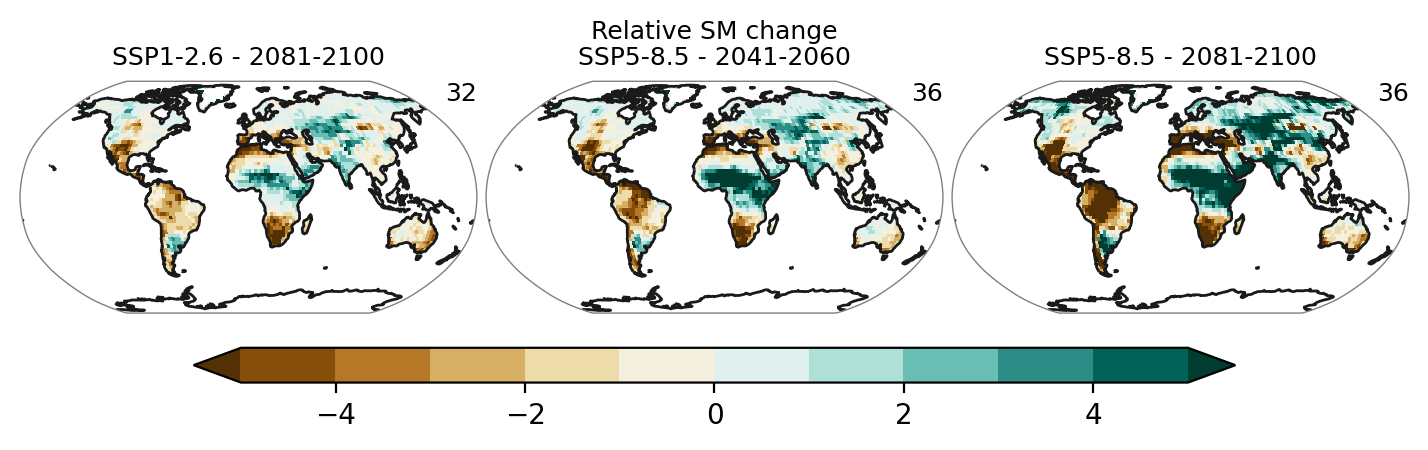

In [7]:
levels = np.arange(-5, 5.1, 1)

opt = dict(average="median", levels=levels, mask_ocean=True, cmap="BrBG")

# ===


f, axes = plot.map_subplots(1, 3)

ax = axes[0]
h, __ = plot.one_map(c6_mrso_ssp126_2081_2100, ax, **opt)
ax.set_title("SSP1-2.6 - 2081-2100", size=9)

ax = axes[1]
h, __ = plot.one_map(c6_mrso_ssp585_2041_2060, ax, **opt)
ax.set_title("SSP5-8.5 - 2041-2060", size=9)

ax = axes[2]
h, __ = plot.one_map(c6_mrso_ssp585_2081_2100, ax, **opt)
ax.set_title("SSP5-8.5 - 2081-2100", size=9)

# ===

mpu.colorbar(h, axes[0], axes[2], orientation="horizontal", size=0.15, shrink=0.25)


f.subplots_adjust(wspace=0.02, left=0.01, right=0.99, top=0.8)
f.suptitle("Relative SM change", size=9)

mpu.set_map_layout(axes, width=18)


# ===
# data tables

fN = conf.cmip6.figure_filename("SM_tot_time_ave", FIGURE_FOLDER, "data_tables")

data_tables.save_simulation_info_raw(
    fN + "_126_md_raw", c6_mrso_ssp126_2081_2100, add_tas=False, panel="j"
)
data_tables.save_simulation_info_raw(
    fN + "_585_md_raw", c6_mrso_ssp585_2041_2060, add_tas=False, panel="k,l"
)

In [8]:
warming_levels = [1.5, 2.0, 4.0]

c6_at_warming_mrso = computation.at_warming_levels_list(
    c6_tas, c6_mrso, warming_levels=warming_levels
)

In [9]:
def to_csv(fN, data):
    data = dict(model=data.model.values, exp=data.exp.values)

    df = pd.DataFrame.from_dict(data)

    df = df.sort_values("model")
    df.to_csv(fN, index=False)

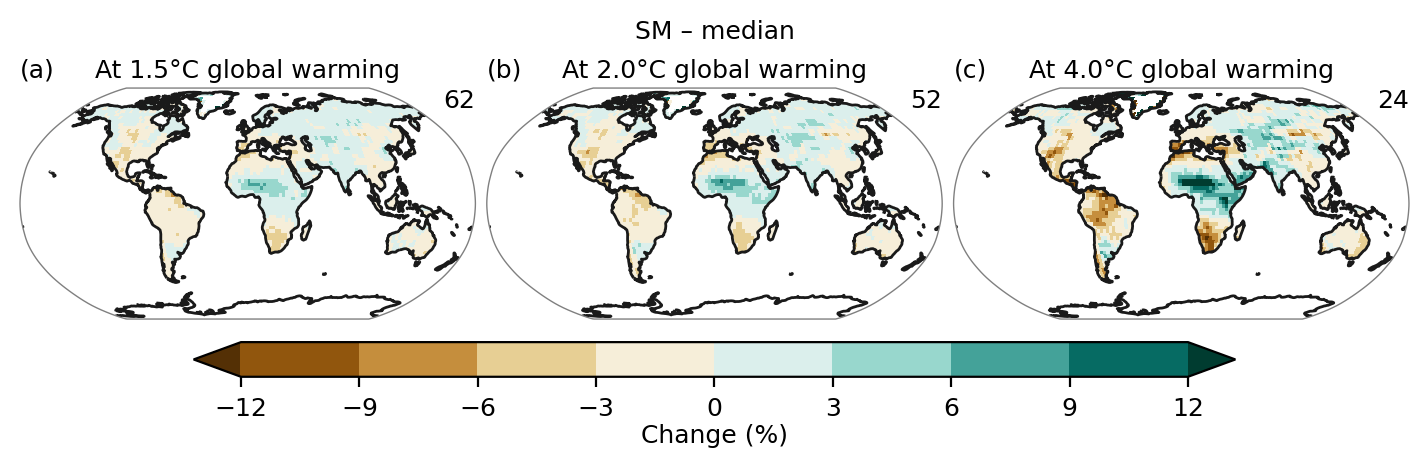

In [10]:
levels = np.arange(-12, 13, 3)


plot.at_warming_level_one(
    c6_at_warming_mrso,
    "Change (%)",
    "SM",
    levels=levels,
    average="median",
    mask_ocean=True,
    cmap="BrBG",
)



fN = conf.cmip6.figure_filename("SM_tot_at_w", FIGURE_FOLDER, "data_tables")
# plt.savefig(fN + ".pdf", dpi=300)
# plt.savefig(fN + ".png", dpi=300, transparent=False, facecolor="w")

dta_ = c6_at_warming_mrso
data_tables.save_simulation_info_raw(fN + "_1.5_md_raw", dta_[0], panel="1.5")
data_tables.save_simulation_info_raw(fN + "_2.0_md_raw", dta_[1], panel="2.0")
data_tables.save_simulation_info_raw(fN + "_4.0_md_raw", dta_[2], panel="4.0")


to_csv(fN + "_1.5.csv", dta_[0])
to_csv(fN + "_2.0.csv", dta_[1])
to_csv(fN + "_4.0.csv", dta_[2])